In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model

In [89]:
crime = pd.read_excel('new_york_crime.xlsx')
crime.head(10)

,City,Population,Violent crime,Murder and non-negilent manslaughter,Rape1,Rape2,Robbery,Aggravated assualt,Property crime,Burglary,Larceny-theft,motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN
5,Alfred Village,4089.0,5.0,0.0,NaN,0.0,3.0,2.0,46.0,10.0,36.0,0.0,NaN
6,Allegany Village,1781.0,3.0,0.0,NaN,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0
7,Amherst Town,118296.0,107.0,1.0,NaN,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0
8,Amityville Village,9519.0,9.0,0.0,NaN,2.0,4.0,3.0,210.0,16.0,188.0,6.0,1.0
9,Amsterdam,18182.0,30.0,0.0,NaN,0.0,12.0,18.0,405.0,99.0,291.0,15.0,0.0


In [90]:
crime.index

RangeIndex(start=0, stop=353, step=1)

In [91]:
crime.describe()

,Population,Violent crime,Murder and non-negilent manslaughter,Rape1,Rape2,Robbery,Aggravated assualt,Property crime,Burglary,Larceny-theft,motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [92]:
# Removing outlier in property crime
crime.loc[crime['Property crime'] == 141971]
crime = crime.drop(crime.index[[216]])


In [93]:
crime = crime.fillna(0)

In [94]:
crime = crime.drop(crime.index[[347, 349, 350, 351, 351]])

In [95]:
crime = crime.drop(['City', 'Arson3','Violent crime', 'Rape1',
           'Rape2', 'Burglary', 'Larceny-theft', 'motor vehicle theft' ], axis=1)

In [96]:
crime = crime.rename(columns={'Murder and non-negilent manslaughter': 'Murder'})

In [97]:
crime.head(10)

,Population,Murder,Robbery,Aggravated assualt,Property crime
0,1861.0,0.0,0.0,0.0,12.0
1,2577.0,0.0,0.0,3.0,24.0
2,2846.0,0.0,0.0,3.0,16.0
3,97956.0,8.0,227.0,526.0,4090.0
4,6388.0,0.0,4.0,16.0,223.0
5,4089.0,0.0,3.0,2.0,46.0
6,1781.0,0.0,0.0,3.0,10.0
7,118296.0,1.0,31.0,68.0,2118.0
8,9519.0,0.0,4.0,3.0,210.0
9,18182.0,0.0,12.0,18.0,405.0


In [98]:
# converting murder and robbery to 0 and 1 values categorical
Murder = np.array(crime['Murder'].values.tolist())
Robbery  = np.array(crime['Robbery'].values.tolist())

crime['Murder'] = np.where(Murder > 0, 1, Murder).tolist()
crime['Robbery'] = np.where(Robbery > 0, 1, Robbery).tolist()

print(crime)

     Population  Murder  Robbery  Aggravated assualt  Property crime
0        1861.0     0.0      0.0                 0.0            12.0
1        2577.0     0.0      0.0                 3.0            24.0
2        2846.0     0.0      0.0                 3.0            16.0
3       97956.0     1.0      1.0               526.0          4090.0
4        6388.0     0.0      1.0                16.0           223.0
5        4089.0     0.0      1.0                 2.0            46.0
6        1781.0     0.0      0.0                 3.0            10.0
7      118296.0     1.0      1.0                68.0          2118.0
8        9519.0     0.0      1.0                 3.0           210.0
9       18182.0     0.0      1.0                18.0           405.0
10       2053.0     0.0      0.0                 0.0            39.0
11       4523.0     0.0      1.0                 2.0            33.0
12        658.0     0.0      0.0                 0.0             2.0
13       2522.0     0.0      0.0  

In [99]:
x = crime.drop('Property crime', axis=1)

regr = linear_model.LinearRegression()
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
regr.fit(x, crime['Property crime'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
print ('Estimated intercept coefficients:', regr.intercept_)

Estimated intercept coefficients: -18.424436834361586


In [102]:
print ('Number of coefficients:', len(regr.coef_))

Number of coefficients: 4


In [103]:
regr.score(x, crime['Property crime'])

0.922581634542631

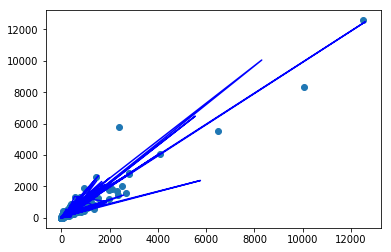

In [104]:
plt.scatter(crime['Property crime'], regr.predict(x))
plt.plot(regr.predict(x), crime['Property crime'], color='blue')
plt.show()


In [105]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, crime['Property crime'] ,test_size=0.33, random_state = 5)

print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(233, 4)
(115, 4)
(233,)
(115,)


In [107]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)

In [108]:
print ('Fit a model X_train, and calculate MSE with y_train:', np.mean((y_train - lm.predict(x_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, y_test:', np.mean((y_test - lm.predict(x_test)) ** 2))

Fit a model X_train, and calculate MSE with y_train: 37179.35135598135
Fit a model X_train, and calculate MSE with X_test, y_test: 210877.6167588764


Text(0,0.5,'Residuals')

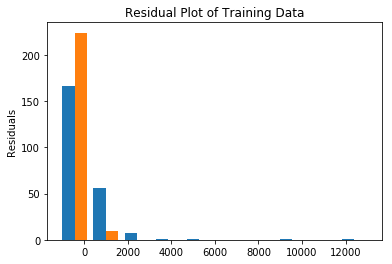

In [109]:
train_residuals = (lm.predict(x_train), lm.predict(x_train) - y_train)
test_residuals = (lm.predict(x_test), lm.predict(x_test) - y_test)
plt.hist(train_residuals)
plt.title('Residual Plot of Training Data')
plt.ylabel('Residuals')

Text(0.5,1,'Residual Plot of Test Data')

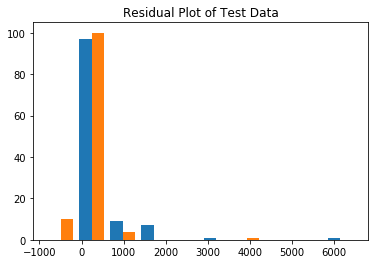

In [110]:
plt.hist(test_residuals)
plt.title('Residual Plot of Test Data')

In [111]:
correlation_matrix = x.corr()
display(correlation_matrix)

,Population,Murder,Robbery,Aggravated assualt
Population,1.000000,0.503024,0.345506,0.834595
Murder,0.503024,1.000000,0.311171,0.421985
Robbery,0.345506,0.311171,1.000000,0.176035
Aggravated assualt,0.834595,0.421985,0.176035,1.000000


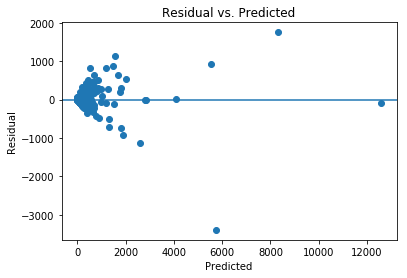

In [112]:
predicted = regr.predict(x).ravel()
actual = crime['Property crime']

residual = actual - predicted

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()